In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv('PS4_GamesSales_cleaned_data.csv', encoding='ISO-8859-1', index_col=0 )
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
S_no,,,,,,,,,
1,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
3,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
4,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
5,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [54]:
df.dtypes

Game              object
Year             float64
Genre             object
Publisher         object
North America    float64
Europe           float64
Japan            float64
Rest of World    float64
Global           float64
dtype: object

### 1. Identify the top 5 best-selling games globally

In [57]:
df['Game'].nunique()

824

In [59]:
df['Game'].value_counts()

Game
Biomutant                                           2
Grand Theft Auto V                                  1
Don't Starve                                        1
Phantasy Star Online 2 Episode 4: Deluxe Package    1
Saints Row: Gat out of Hell                         1
                                                   ..
Just Dance 2018                                     1
The Walking Dead: Season Two                        1
Sword Art Online: Fatal Bullet                      1
Naruto to Boruto: Shinobi Striker                   1
Radial G Racing Revolved                            1
Name: count, Length: 824, dtype: int64

In [61]:
best_selling_games = df.nlargest(5, 'Global')[['Game', 'Global']]
best_selling_games


,Game,Global
S_no,,
1,Grand Theft Auto V,19.39
2,Call of Duty: Black Ops 3,15.09
3,Red Dead Redemption 2,13.94
4,Call of Duty: WWII,13.40
5,FIFA 18,11.80


In [154]:
best_selling_games_method2 = df.groupby('Game')['Global'].sum()
best_selling_games_method2

Game
.hack//G.U. Last Recode                                                            0.24
7 Days to Die                                                                      0.21
A Way Out                                                                          0.48
ABZU                                                                               0.04
ARK: Survival Evolved                                                              0.81
ATV Drift & Tricks                                                                 0.09
ATV Renegades                                                                      0.01
Accel World vs. Sword Art Online: Millennium Twilight                              0.10
Ace Combat 7: Skies Unknown                                                        0.00
Adventure Time: Finn & Jake Investigations                                         0.14
Aegis of Earth: Protonovus Assault                                                 0.04
AereA                      

In [146]:
top_5_Game = best_selling_games_method2.nlargest(5)


In [150]:
 top_5_Game

Game
Grand Theft Auto V           19.39
Call of Duty: Black Ops 3    15.09
Red Dead Redemption 2        13.94
Call of Duty: WWII           13.40
FIFA 18                      11.80
Name: Global, dtype: float64

#### 2. Compare regional sales (North America, Europe, Japan, and Rest of the World) for each genre to understand market preferences.

In [65]:
df['Genre'].nunique()

17

In [67]:
df['Genre'].value_counts()

Genre
Action              205
Role-Playing        107
Shooter              75
Adventure            71
Sports               69
Misc                 55
Racing               48
Action-Adventure     38
Platform             33
Fighting             32
Strategy             25
Simulation           21
Music                18
Puzzle               10
MMO                   8
Visual Novel          8
Party                 2
Name: count, dtype: int64

In [69]:
sales_as_per_region  = df.groupby('Genre')[['North America', 'Europe', 'Japan', 'Rest of World']].sum()
print(sales_as_per_region)


                  North America  Europe  Japan  Rest of World
Genre                                                        
Action                    48.15   57.51  10.27          20.76
Action-Adventure          22.30   27.79   1.96           9.83
Adventure                  5.27    6.08   1.64           2.23
Fighting                   8.58    6.11   1.67           2.97
MMO                        1.32    1.45   0.20           0.55
Misc                       3.64    6.03   0.96           1.85
Music                      2.40    1.62   0.17           0.84
Party                      0.09    0.47   0.00           0.10
Platform                   5.48    8.92   0.67           2.77
Puzzle                     0.28    0.16   0.00           0.10
Racing                     5.86   14.77   0.76           3.81
Role-Playing              22.15   22.40   9.33           8.91
Shooter                   50.50   58.64   4.42          21.48
Simulation                 1.47    2.07   0.28           0.71
Sports  

#### 3. Find the publisher with the highest total global sales.


In [72]:
df['Publisher'].nunique()

152

In [74]:
df['Publisher'].value_counts()

Publisher
Namco Bandai Games                56
Sony Interactive Entertainment    47
Ubisoft                           45
Square Enix                       40
Tecmo Koei                        37
                                  ..
Take-Two Interactive               1
CokeM Interactive                  1
Frontier Developments              1
Mojang                             1
Tammeka Games                      1
Name: count, Length: 152, dtype: int64

In [114]:
 pd.options.display.max_rows = None

In [132]:
publisher_sales = df.groupby('Publisher')['Global'].sum()


In [134]:
publisher_sales

Publisher
2K Games                                   8.03
2K Sports                                 17.36
3D Realms                                  0.00
505 Games                                  4.19
5pb                                        0.12
Accolade                                   0.05
Acquire                                    0.14
Active Gaming Media                        0.01
Activision                                72.44
Aksys Games                                0.20
Alternative Software                       0.04
Arc System Works                           0.24
Astragon                                   0.24
Atari                                      0.13
Atlus                                      0.13
Avanquest                                  0.07
Badland Studio                             0.15
Bandai Namco Entertainment                 0.00
Bandai Namco Games                         1.57
Bethesda Softworks                        28.96
Big Ben Interactive           

In [136]:
top_publisher = publisher_sales.idxmax()
top_sales = publisher_sales.max()

In [138]:
top_publisher

'Activision'

In [140]:
top_sales

72.44

In [168]:
print (f"Presenting you the  Top Publisher :{top_publisher}\nwith highest global sales : {top_sales} ")

Presenting you the  Top Publisher :Activision
with highest global sales : 72.44 


#### 4. Analyze the year with the highest number of game releases.


In [174]:
df['Game'].nunique()

824

In [214]:
df.groupby('Year')['Game'].count()


Year
2013.0     20
2014.0     98
2015.0    172
2016.0    222
2017.0    254
2018.0     39
2019.0     12
2020.0      8
Name: Game, dtype: int64

In [216]:
year_higest_no_of_game_release=df.groupby('Year')['Game'].count().nlargest(1)

In [218]:
year_higest_no_of_game_release

Year
2017.0    254
Name: Game, dtype: int64

#### 5. Determine the most popular genre globally based on total sales.


In [235]:
df.groupby('Genre')['Global'].sum().nlargest(1)

Genre
Action    136.82
Name: Global, dtype: float64

In [237]:
popular_genre_globally=df.groupby('Genre')['Global'].sum().nlargest(1)

In [246]:
print (f"Most popular genre globally based on total sales is : \n{popular_genre_globally}")

Most popular genre globally based on total sales is : 
Genre
Action    136.82
Name: Global, dtype: float64


#### 6. Identify the game with the highest sales in Japan compared to other regions.


In [248]:
df.groupby('Game')['Japan'].sum().nlargest(1)

Game
Monster Hunter: World    2.17
Name: Japan, dtype: float64

#### 7. Examine if there is a correlation between sales in North America and Europe.


In [253]:
correlation = df['North America'].corr(df['Europe'])

print(f"Correlation between North America and Europe sales: {correlation}")

Correlation between North America and Europe sales: 0.8107281993891697


#### 8. Compare the sales growth trend for "Action" and "Shooter" genres over the years

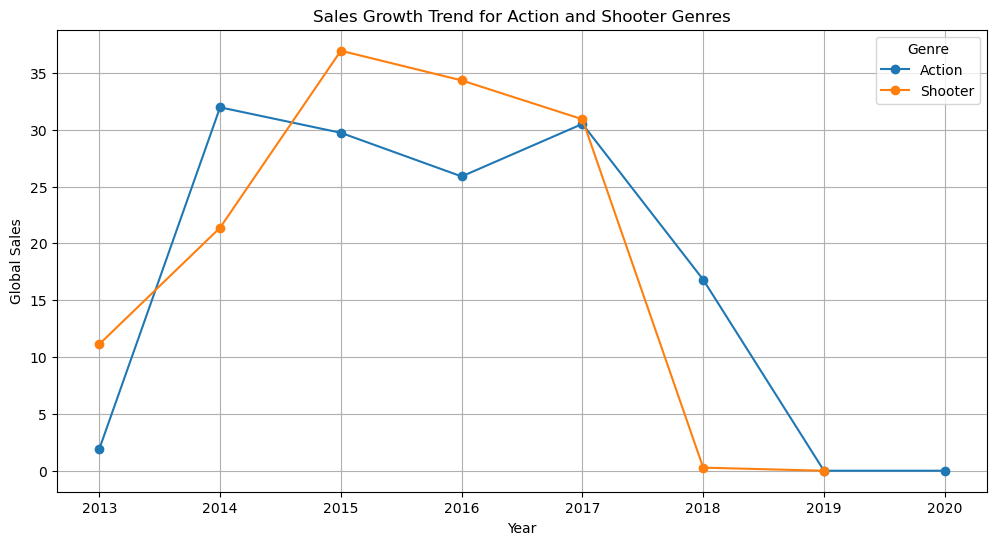

In [278]:
filtered_data = df[df['Genre'].isin(['Action', 'Shooter'])]
sales_trend = filtered_data.groupby(['Year', 'Genre'])['Global'].sum().unstack()
sales_trend.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Sales Growth Trend for Action and Shooter Genres')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.legend(title='Genre')
plt.grid(True)
plt.show()


In [288]:

regions = ['North America', 'Europe', 'Japan', 'Rest of World']


top_publishers_by_region = {}
for region in regions:
   
    region_sales = df.groupby('Publisher')[region].sum()
    top_publisher = region_sales.idxmax()
    top_sales = region_sales.max()
    top_publishers_by_region[region] = (top_publisher, top_sales)

for region, (publisher, sales) in top_publishers_by_region.items():
    print(f"Top Publisher in {region}: {publisher} with sales of {sales:.2f} million")


Top Publisher in North America: Activision with sales of 28.20 million
Top Publisher in Europe: Activision with sales of 30.96 million
Top Publisher in Japan: Square Enix with sales of 5.95 million
Top Publisher in Rest of World: Activision with sales of 11.71 million


#### 10.Visualize the distribution of global sales to identify patterns and outliers

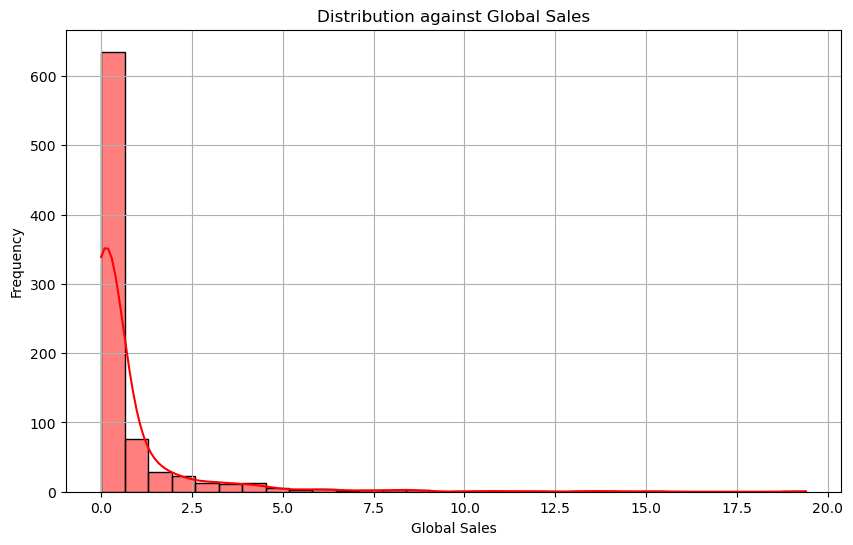

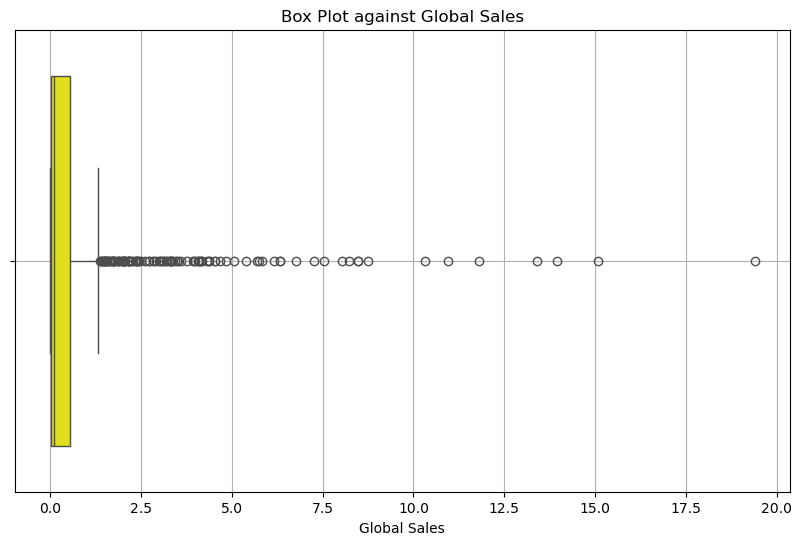

In [306]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Global'], bins=30, kde=True, color='red')
plt.title('Distribution against Global Sales')
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Global'], color='yellow')
plt.title('Box Plot against Global Sales')
plt.xlabel('Global Sales')
plt.grid(True)
plt.show()



#### 11. Create visualizations to better understand and communicate data insights:



##### ○ Distribution of global sales (histogram).

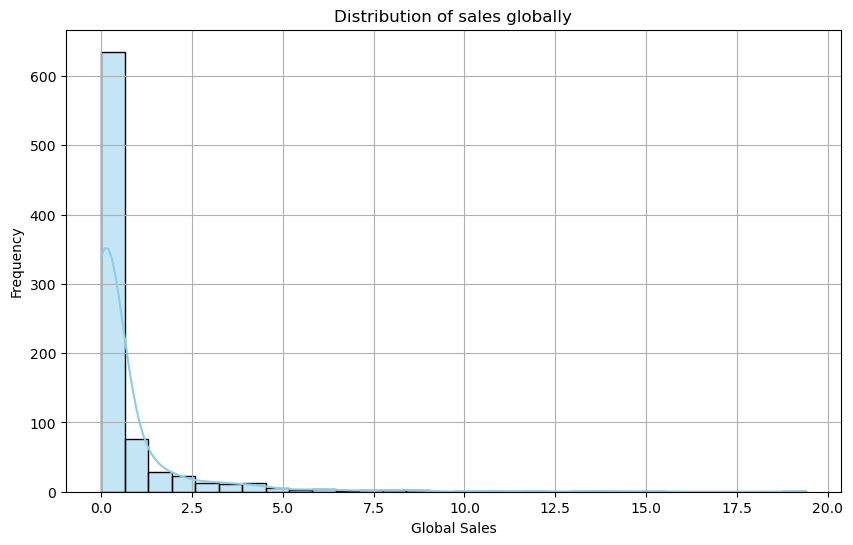

In [328]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Global'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of sales globally')
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


##### ○ Total sales comparison for regions (bar chart).


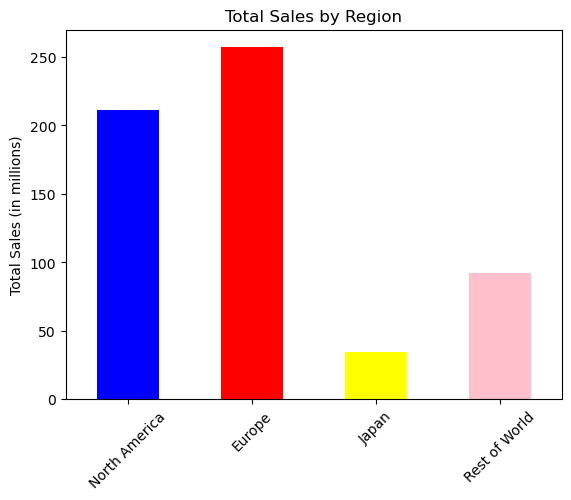

In [335]:
region_sales = df[['North America', 'Europe', 'Japan', 'Rest of World']].sum()
region_sales.plot(kind='bar', color=['blue', 'red', 'yellow', 'Pink'])
plt.title('Total Sales by Region')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()


##### ○ Share of total global sales by genre (pie chart).


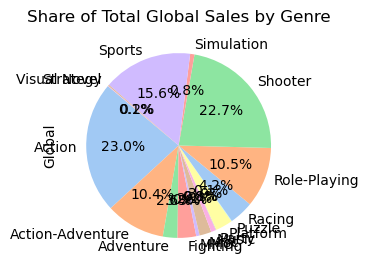

In [404]:

genre_sales = df.groupby('Genre')['Global'].sum()

plt.figure(figsize=(3, 3))
genre_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Share of Total Global Sales by Genre')

plt.show()

##### ○ Trend of global sales over the years (line chart).


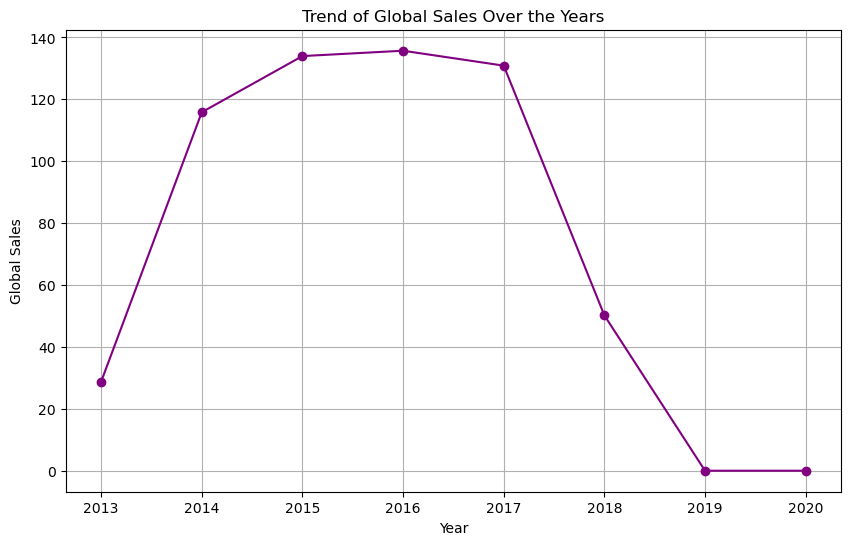

In [400]:

sales_trend = df.groupby('Year')['Global'].sum()

plt.figure(figsize=(10, 6))
sales_trend.plot(kind='line', marker='o', color='purple')
plt.title('Trend of Global Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.grid(True)
plt.show()


##### ○ Top 10 best-selling games globally (horizontal bar chart).


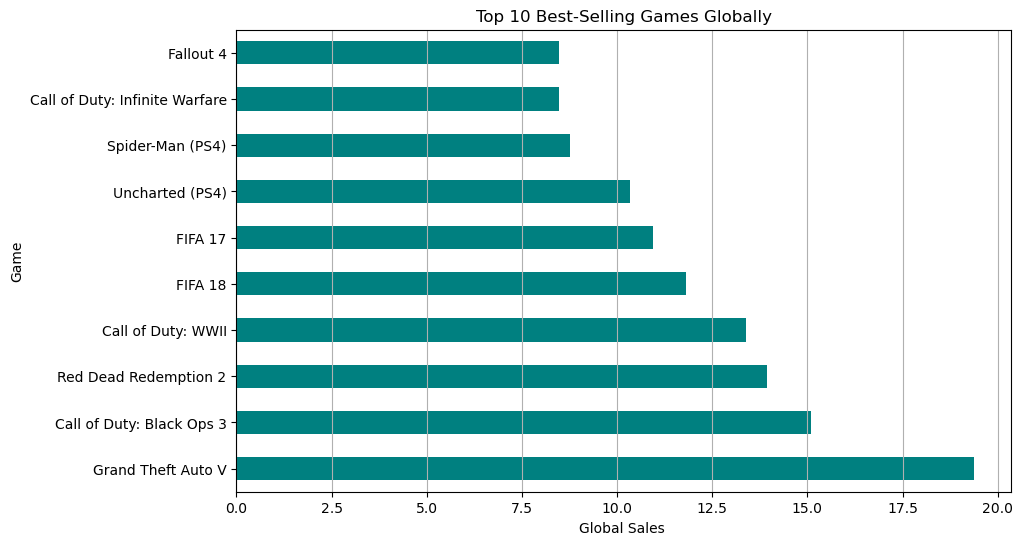

In [398]:
top_10_games = df.nlargest(10, 'Global')[['Game', 'Global']].set_index('Game')
plt.figure(figsize=(10, 6))
top_10_games['Global'].plot(kind='barh', color='teal')
plt.title('Top 10 Best-Selling Games Globally')
plt.xlabel('Global Sales ')
plt.ylabel('Game')
plt.grid(axis='x')
plt.show()


##### ○ Correlation between regional sales (heatmap).


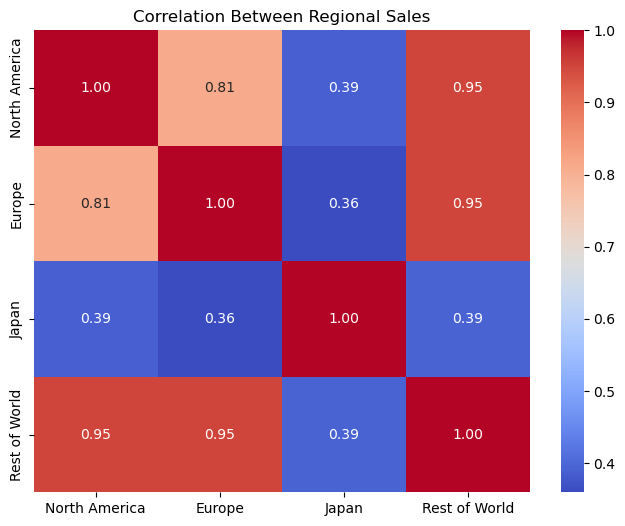

In [383]:
region_correlation = df[['North America', 'Europe', 'Japan', 'Rest of World']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(region_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Regional Sales')
plt.show()


##### ○ Contribution of each genre to regional sales (stacked bar chart).

In [389]:
df['Genre'].nunique()

17

In [393]:
df['Genre'].value_counts()

Genre
Action              205
Role-Playing        107
Shooter              75
Adventure            71
Sports               69
Misc                 55
Racing               48
Action-Adventure     38
Platform             33
Fighting             32
Strategy             25
Simulation           21
Music                18
Puzzle               10
MMO                   8
Visual Novel          8
Party                 2
Name: count, dtype: int64

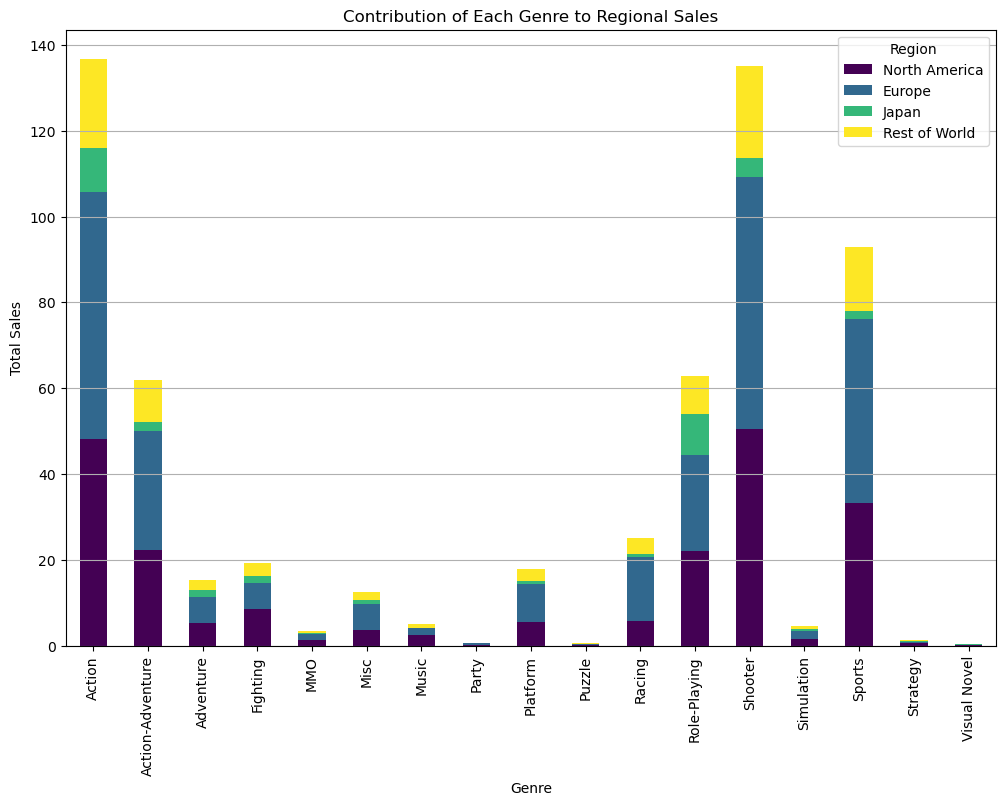

In [396]:
genre_region_sales = df.groupby('Genre')[['North America', 'Europe', 'Japan', 'Rest of World']].sum()
genre_region_sales.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Contribution of Each Genre to Regional Sales')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.legend(title='Region')
plt.grid(axis='y')
plt.show()
